In [241]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#estimators
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [242]:
wifidf = pd.read_csv('wifidfnew.csv')

In [243]:
validationdf = pd.read_csv('validationdfnew.csv')

In [244]:
#features
X_train = wifidf.iloc[:, 1:521]
X_train = X_train.replace(100, 0)
X_train[X_train < -78] = 1
X_train[X_train < 0] = 2
#X_train = pd.concat([wifidf.iloc[:, 1:521], wifidf.iloc[:, 524]], axis=1)
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
#X_train = X_train.astype(float)

In [246]:
#X_train = 10**(X_train/10)

In [247]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
X_train = pd.concat([X_train, wifidf.iloc[:, 524]], axis=1)

In [249]:
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)

In [250]:
X_train.shape

(19937, 521)

In [251]:
#X_train_scaled = pd.DataFrame(X_train_scaled)

In [252]:
#X_train_scaled

In [253]:
y_train = wifidf.iloc[:, 522]
y_train.head()

0    4.864921e+06
1    4.864934e+06
2    4.864950e+06
3    4.864934e+06
4    4.864982e+06
Name: LATITUDE, dtype: float64

In [254]:
#Testing Set (X Testing)
#X_validation = pd.concat([validationdf.iloc[:, 1:521], validationdf.iloc[:, 524]], axis=1)
#X_validation.head()
X_validation = validationdf.iloc[:, 1:521]
X_validation = X_validation.replace(100, 0)
X_validation[X_validation < -78] = 1
X_validation[X_validation < 0] = 2
X_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
#X_validation = X_validation.astype(float)

In [256]:
#X_validation = 10**(X_validation/10)

In [257]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
X_validation = pd.concat([X_validation, validationdf.iloc[:, 524]], axis=1)

In [259]:
#X_validation_scaled = scaler.transform(X_validation)
#X_validation_scaled = pd.DataFrame(X_validation_scaled)

In [260]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
list(X_validation.columns)

['WAP001',
 'WAP002',
 'WAP003',
 'WAP004',
 'WAP005',
 'WAP006',
 'WAP007',
 'WAP008',
 'WAP009',
 'WAP010',
 'WAP011',
 'WAP012',
 'WAP013',
 'WAP014',
 'WAP015',
 'WAP016',
 'WAP017',
 'WAP018',
 'WAP019',
 'WAP020',
 'WAP021',
 'WAP022',
 'WAP023',
 'WAP024',
 'WAP025',
 'WAP026',
 'WAP027',
 'WAP028',
 'WAP029',
 'WAP030',
 'WAP031',
 'WAP032',
 'WAP033',
 'WAP034',
 'WAP035',
 'WAP036',
 'WAP037',
 'WAP038',
 'WAP039',
 'WAP040',
 'WAP041',
 'WAP042',
 'WAP043',
 'WAP044',
 'WAP045',
 'WAP046',
 'WAP047',
 'WAP048',
 'WAP049',
 'WAP050',
 'WAP051',
 'WAP052',
 'WAP053',
 'WAP054',
 'WAP055',
 'WAP056',
 'WAP057',
 'WAP058',
 'WAP059',
 'WAP060',
 'WAP061',
 'WAP062',
 'WAP063',
 'WAP064',
 'WAP065',
 'WAP066',
 'WAP067',
 'WAP068',
 'WAP069',
 'WAP070',
 'WAP071',
 'WAP072',
 'WAP073',
 'WAP074',
 'WAP075',
 'WAP076',
 'WAP077',
 'WAP078',
 'WAP079',
 'WAP080',
 'WAP081',
 'WAP082',
 'WAP083',
 'WAP084',
 'WAP085',
 'WAP086',
 'WAP087',
 'WAP088',
 'WAP089',
 'WAP090',
 'WAP091',

In [262]:
#Ground Truth (y_test) 
y_validation = validationdf.iloc[:, 522]
y_validation_count = len(y_validation.index)
print('The number of observations in the Y training set are:',str(y_validation_count))
y_validation.head()

The number of observations in the Y training set are: 1111


0    4.864890e+06
1    4.864840e+06
2    4.864847e+06
3    4.864843e+06
4    4.864922e+06
Name: LATITUDE, dtype: float64

In [263]:
X_train.shape, X_validation.shape

((19937, 521), (1111, 521))

In [265]:
#Models
modelSVR = SVR()
modelRF = GradientBoostingRegressor()
modelLR = LinearRegression()

In [394]:
modelknn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'distance')

In [395]:
#modelSVR.fit(X_train, y_train)
#modelRF.fit(X_train, y_train)
#modelLR.fit(X_train, y_train)

In [127]:
#modelknn.score(X_train, y_train)

0.9943131450807822

In [114]:
#modelSVR.score(X_train, y_train)

0.5927627795537824

In [115]:
#modelRF.score(X_train, y_train)

0.9511066545750944

In [116]:
#modelLR.score(X_train, y_train)

0.8497331189888582

In [396]:
modelknn.fit(X_train, y_train)
predictions = modelknn.predict(X_validation)

In [397]:
y_validation

0       4.864890e+06
1       4.864840e+06
2       4.864847e+06
3       4.864843e+06
4       4.864922e+06
            ...     
1106    4.864796e+06
1107    4.864792e+06
1108    4.864903e+06
1109    4.864905e+06
1110    4.864904e+06
Name: LATITUDE, Length: 1111, dtype: float64

In [398]:
predictions

array([4864925.62407356, 4864842.64361328, 4864848.42164525, ...,
       4864909.6676991 , 4864908.94728869, 4864913.80624019])

In [399]:
rmse = sqrt(mean_squared_error(y_validation, predictions))

In [400]:
predRsquared = r2_score(y_validation,predictions)

In [401]:
MAE = sum(abs(y_validation - predictions))/len(predictions)

In [402]:
#Make Predictions
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % MAE)

R Squared: 0.981
RMSE: 9.802
MAE: 5.910


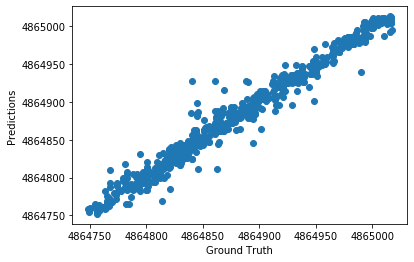

In [403]:
plt.scatter(y_validation, predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [404]:
sum(abs(y_validation - predictions))

6566.011846008711

In [405]:
latitudeerror = y_validation - predictions

In [406]:
latitudeerror = pd.DataFrame(latitudeerror)

In [407]:
latitudeerror.columns = ['latitudeerror']

In [408]:
latitudeerror

,latitudeerror
0,-35.961157
1,-2.903306
2,-1.887923
3,-3.647291
4,7.831352
...,...
1106,2.080810
1107,-10.392542
1108,-6.438274
1109,-4.011426


In [409]:
latitudeerror.to_csv('latitudeerror.csv')